<a href="https://colab.research.google.com/github/DiegoBrito17/Analise-de-dados/blob/main/TreinamentoMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Treinamneto de Machine learning



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dados simples
X = [[25], [45], [35], [50]]
y = [0, 1, 0, 1]

In [7]:
# Treinamento
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [9]:
# Gera idades de 20 a 60 anos
idades = np.linspace(20, 60, 200).reshape(-1, 1)

In [10]:
# Probabilidade prevista de ganhar mais de 50k
probabilidades = modelo.predict_proba(idades)[:, 1]

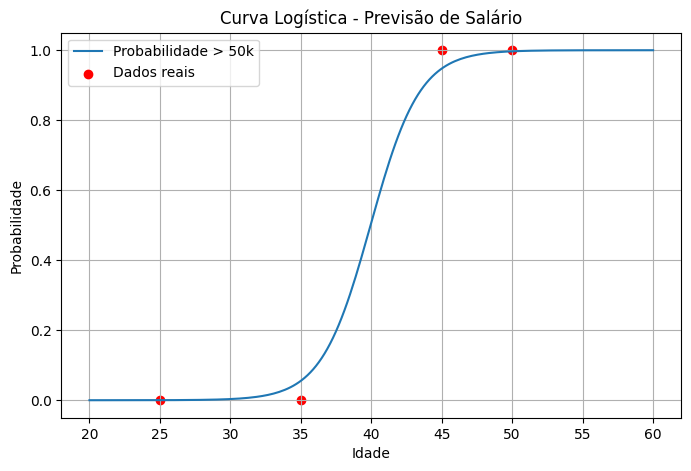

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dados simples
X = [[25], [45], [35], [50]]
y = [0, 1, 0, 1]

# Treinamento
modelo = LogisticRegression()
modelo.fit(X, y)

# Gera idades de 20 a 60 anos
idades = np.linspace(20, 60, 200).reshape(-1, 1)

# Probabilidade prevista de ganhar mais de 50k
probabilidades = modelo.predict_proba(idades)[:, 1]

# Plot
plt.figure(figsize=(8,5))
plt.plot(idades, probabilidades, label="Probabilidade > 50k")
plt.scatter(X, y, color="red", label="Dados reais")
plt.xlabel("Idade")
plt.ylabel("Probabilidade")
plt.title("Curva Logística - Previsão de Salário")
plt.legend()
plt.grid(True)
plt.show()


MSE: 0.0


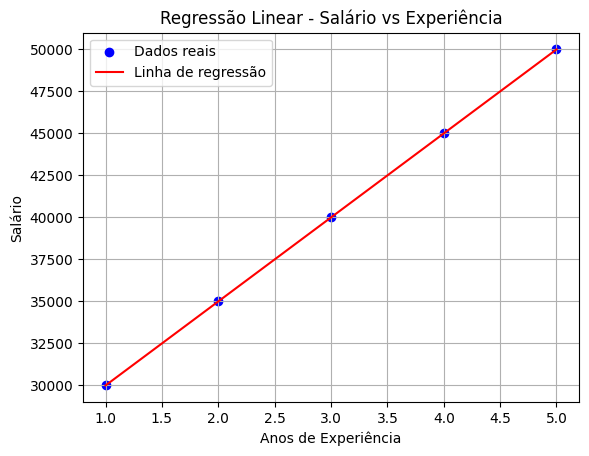

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exemplo: Previsão de salário com base nos anos de experiência
data = pd.DataFrame({
    'anos_experiencia': [1, 2, 3, 4, 5],
    'salario': [30000, 35000, 40000, 45000, 50000]
})

X = data[['anos_experiencia']]
y = data['salario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

# --- Gráfico ---
plt.scatter(X, y, color='blue', label='Dados reais')  # pontos reais
plt.plot(X, modelo.predict(X), color='red', label='Linha de regressão')  # reta do modelo
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title("Regressão Linear - Salário vs Experiência")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Previsão para idade 5: ['jovem']


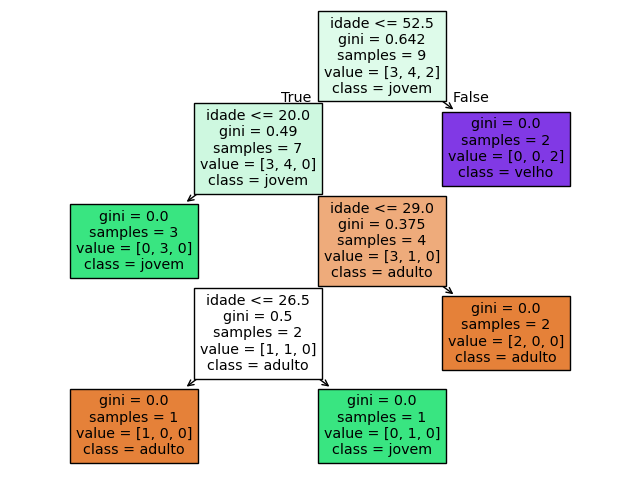

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Exemplo: Classificar pessoas como jovens, adultos ou velhos
data = pd.DataFrame({
    'idade': [15, 25, 30, 12, 40, 65, 14, 28, 78],
    'classe': ['jovem', 'adulto', 'adulto', 'jovem', 'adulto', 'velho', 'jovem', 'jovem', 'velho']
})

X = data[['idade']]
y = data['classe']

modelo = DecisionTreeClassifier()
modelo.fit(X, y)

print("Previsão para idade 5:", modelo.predict([[5]]))

# --- Desenhar a árvore ---
plt.figure(figsize=(8,6))
plot_tree(modelo, feature_names=['idade'], class_names=modelo.classes_, filled=True)
plt.show()



O gráfico vai mostrar:

O nó de decisão (por exemplo: "idade <= 19.5")

Quantos exemplos caem em cada nó

A classe prevista em cada folha

As cores que indicam a classe dominante

Previsão para idade 5: ['jovem']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


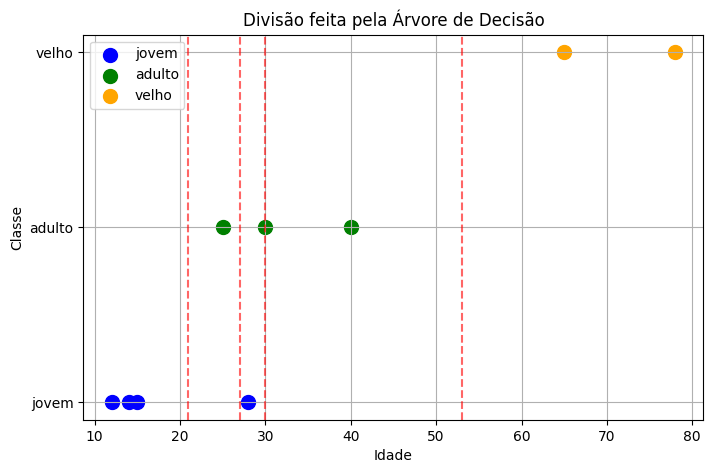

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Dados
data = pd.DataFrame({
    'idade': [15, 25, 30, 12, 40, 65, 14, 28, 78],
    'classe': ['jovem', 'adulto', 'adulto', 'jovem', 'adulto', 'velho', 'jovem', 'jovem', 'velho']
})

X = data[['idade']]
y = data['classe']

# Modelo
modelo = DecisionTreeClassifier()
modelo.fit(X, y)

# Previsão de exemplo
print("Previsão para idade 5:", modelo.predict([[5]]))

# Preparar para plotar
cores = {'jovem': 'blue', 'adulto': 'green', 'velho': 'orange'}

plt.figure(figsize=(8,5))

# Pontos reais
for classe in data['classe'].unique():
    subset = data[data['classe'] == classe]
    plt.scatter(subset['idade'], [classe]*len(subset),
                color=cores[classe], label=classe, s=100)

# Gerar previsões para idades de 0 a 80
idades_range = np.arange(0, 81).reshape(-1, 1)
previsoes = modelo.predict(idades_range)

# Encontrar pontos de corte
for i in range(1, len(previsoes)):
    if previsoes[i] != previsoes[i-1]:
        plt.axvline(x=idades_range[i][0], color='red', linestyle='--', alpha=0.6)

plt.xlabel("Idade")
plt.ylabel("Classe")
plt.title("Divisão feita pela Árvore de Decisão")
plt.legend()
plt.grid(True)
plt.show()


Nesse gráfico:

Pontos azuis = jovem, verdes = adulto, laranjas = velho.

As linhas vermelhas tracejadas são as idades onde a árvore decidiu mudar de classe.